<a href="https://colab.research.google.com/github/shailesh008/imgClassUsingCNN/blob/master/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf # ML library for graphs
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

#If you are using CPU in a computer having GPU, the line below should be in your cod
#HYPERPARAMETERS
# our photos are in the size of (80,80,3)
IMG_SIZE = 80

epochs = 30
step_size = 8
IMG_SIZE_ALEXNET = 227
validating_size = 40
nodes_fc1 = 4096
nodes_fc2 = 4096
output_classes = 4

TRAIN_DIR = os.getcwd()

In [4]:
import os, sys
print(TRAIN_DIR) # current working directory

/content


In [1]:
from google.colab import files

uploaded = files.upload()

Saving test_data_mc.npy to test_data_mc.npy
Saving train_data_mc.npy to train_data_mc.npy


In [0]:

train_data = np.load('train_data_mc.npy')
test_data = np.load('test_data_mc.npy')

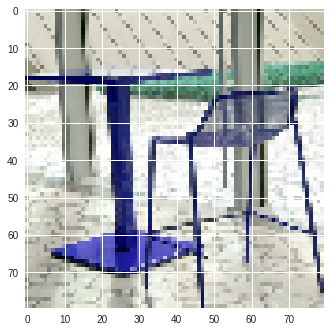

In [25]:
plt.imshow(np.array(train_data[180][0]))

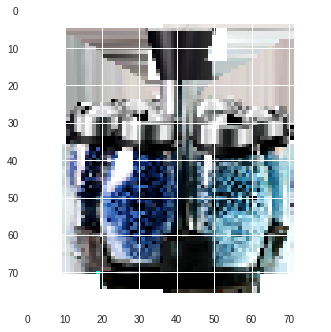

In [7]:
#A KITCHEN
plt.imshow(np.array(train_data[100][0]))

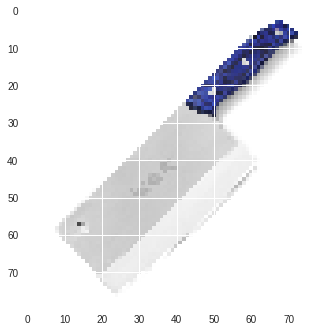

In [8]:
# A KNIFE
plt.imshow(np.array(train_data[111][0]))

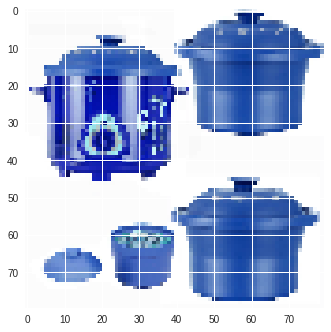

In [9]:
# A SAUCEPAN
plt.imshow(np.array(train_data[154][0]))

In [10]:
#In order to implement ALEXNET, we are resizing them to (227,227,3)
for i in range(len(train_data)):
    train_data[i][0] = cv2.resize(train_data[i][0],(IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET))

for i in range(len(test_data)):
    test_data[i][0] = cv2.resize(test_data[i][0],(IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET))

train = train_data[:4800]
cv = train_data[4800:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET,3)
Y = np.array([i[1] for i in train])

cv_x = np.array([i[0] for i in cv]).reshape(-1,IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET,3)
cv_y = np.array([i[1] for i in cv])
test_x = np.array([i[0] for i in test_data]).reshape(-1,IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET,3)
test_y = np.array([i[1] for i in test_data])

print(X.shape)

print(Y.shape)

print(cv_x.shape)

print(test_x.shape)

(4800, 227, 227, 3)
(4800, 4)
(400, 227, 227, 3)
(1267, 227, 227, 3)


In [11]:
steps = len(train)
print(steps)
remaining = steps % step_size

#Resetting graph
tf.reset_default_graph()

#Defining Placeholders
x = tf.placeholder(tf.float32,shape=[None,IMG_SIZE_ALEXNET,IMG_SIZE_ALEXNET,3])
y_true = tf.placeholder(tf.float32,shape=[None,output_classes])

4800


In [12]:
##CONVOLUTION LAYER 1
#Weights for layer 1
w_1 = tf.Variable(tf.truncated_normal([11,11,3,96], stddev=0.01))
#Bias for layer 1
b_1 = tf.Variable(tf.constant(0.0, shape=[[11,11,3,96][3]]))
#Applying convolution
c_1 = tf.nn.conv2d(x, w_1,strides=[1, 4, 4, 1], padding='VALID')
#Adding bias
c_1 = c_1 + b_1
#Applying RELU
c_1 = tf.nn.relu(c_1)
								
print(c_1)
##POOLING LAYER1
p_1 = tf.nn.max_pool(c_1, ksize=[1, 3, 3, 1],strides=[1, 2, 2, 1], padding='VALID')
print(p_1)


##CONVOLUTION LAYER 2
#Weights for layer 2
w_2 = tf.Variable(tf.truncated_normal([5,5,96,256], stddev=0.01))
#Bias for layer 2
b_2 = tf.Variable(tf.constant(1.0, shape=[[5,5,96,256][3]]))
#Applying convolution
c_2 = tf.nn.conv2d(p_1, w_2,strides=[1, 1, 1, 1], padding='SAME')
#Adding bias
c_2 = c_2 + b_2
#Applying RELU
c_2 = tf.nn.relu(c_2)

print(c_2)

##POOLING LAYER2
p_2 = tf.nn.max_pool(c_2, ksize=[1, 3, 3, 1],strides=[1, 2, 2, 1], padding='VALID')
print(p_2)

##CONVOLUTION LAYER 3
#Weights for layer 3
w_3 = tf.Variable(tf.truncated_normal([3, 3, 256, 384], stddev=0.01))
#Bias for layer 3
b_3 = tf.Variable(tf.constant(0.0, shape=[[3, 3, 256, 384][3]]))
#Applying convolution
c_3 = tf.nn.conv2d(p_2, w_3,strides=[1, 1, 1, 1], padding='SAME')
#Adding bias
c_3 = c_3 + b_3
#Applying RELU
c_3 = tf.nn.relu(c_3)

print(c_3)

##CONVOLUTION LAYER 4
#Weights for layer 4
w_4 = tf.Variable(tf.truncated_normal([3, 3, 384, 384], stddev=0.01))
#Bias for layer 4
b_4 = tf.Variable(tf.constant(0.0, shape=[[3, 3, 384, 384][3]]))
#Applying convolution
c_4 = tf.nn.conv2d(c_3, w_4,strides=[1, 1, 1, 1], padding='SAME')
#Adding bias
c_4 = c_4 + b_4
#Applying RELU
c_4 = tf.nn.relu(c_4)

print(c_4)

##CONVOLUTION LAYER 5
#Weights for layer 5
w_5 = tf.Variable(tf.truncated_normal([3, 3, 384, 256], stddev=0.01))
#Bias for layer 5
b_5 = tf.Variable(tf.constant(0.0, shape=[[3, 3, 384, 256][3]]))
#Applying convolution
c_5 = tf.nn.conv2d(c_4, w_5,strides=[1, 1, 1, 1], padding='SAME')
#Adding bias
c_5 = c_5 + b_5
#Applying RELU
c_5 = tf.nn.relu(c_5)

print(c_5)

##POOLING LAYER3
p_3 = tf.nn.max_pool(c_5, ksize=[1, 3, 3, 1],strides=[1, 2, 2, 1], padding='VALID')
print(p_3)

#Flattening
flattened = tf.reshape(p_3,[-1,6*6*256])
print(flattened)

##Fully Connected Layer 1
#Getting input nodes in FC layer 1
input_size = int( flattened.get_shape()[1] )
#Weights for FC Layer 1
w1_fc = tf.Variable(tf.truncated_normal([input_size, nodes_fc1], stddev=0.01))
#Bias for FC Layer 1
b1_fc = tf.Variable( tf.constant(1.0, shape=[nodes_fc1] ) )
#Summing Matrix calculations and bias
s_fc1 = tf.matmul(flattened, w1_fc) + b1_fc
#Applying RELU
s_fc1 = tf.nn.relu(s_fc1)

#Dropout Layer 1
hold_prob1 = tf.placeholder(tf.float32)
s_fc1 = tf.nn.dropout(s_fc1,keep_prob=hold_prob1)

print(s_fc1)

##Fully Connected Layer 2
#Weights for FC Layer 2
w2_fc = tf.Variable(tf.truncated_normal([nodes_fc1, nodes_fc2], stddev=0.01))
#Bias for FC Layer 2
b2_fc = tf.Variable( tf.constant(1.0, shape=[nodes_fc2] ) )
#Summing Matrix calculations and bias
s_fc2 = tf.matmul(s_fc1, w2_fc) + b2_fc
#Applying RELU
s_fc2 = tf.nn.relu(s_fc2)
print(s_fc2)

#Dropout Layer 2
hold_prob2 = tf.placeholder(tf.float32)
s_fc2 = tf.nn.dropout(s_fc2,keep_prob=hold_prob1)

##Fully Connected Layer 3
#Weights for FC Layer 3
w3_fc = tf.Variable(tf.truncated_normal([nodes_fc2,output_classes], stddev=0.01))
#Bias for FC Layer 3b3_fc = tf.Variable( tf.constant(1.0, shape=[output_classes] ) )
b3_fc = tf.Variable( tf.constant(1.0, shape=[output_classes] ) )
#Summing Matrix calculations and bias
y_pred = tf.matmul(s_fc2, w3_fc) + b3_fc
#Applying RELU
print(y_pred)


Tensor("Relu:0", shape=(?, 55, 55, 96), dtype=float32)
Tensor("MaxPool:0", shape=(?, 27, 27, 96), dtype=float32)
Tensor("Relu_1:0", shape=(?, 27, 27, 256), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 13, 13, 256), dtype=float32)
Tensor("Relu_2:0", shape=(?, 13, 13, 384), dtype=float32)
Tensor("Relu_3:0", shape=(?, 13, 13, 384), dtype=float32)
Tensor("Relu_4:0", shape=(?, 13, 13, 256), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 6, 6, 256), dtype=float32)
Tensor("Reshape:0", shape=(?, 9216), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 4096), dtype=float32)
Tensor("Relu_6:0", shape=(?, 4096), dtype=float32)
Tensor("add_7:0", shape=(?, 4), dtype=float32)


In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y_pred))

In [0]:
#Defining objective
train = tf.train.AdamOptimizer(learning_rate=0.00001).minimize(cross_entropy)


#Defining Accuracy
matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
acc = tf.reduce_mean(tf.cast(matches,tf.float32))

#Initializing weights
init = tf.global_variables_initializer()

#Starting Empty lists to keep results
acc_list = []
auc_list = []
loss_list = []
saver = tf.train.Saver()
#GPU settings
config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth = True
config.gpu_options.allocator_type = 'BFC'

In [15]:
with tf.Session(config=config) as sess:
    sess.run(init)
    for i in range(epochs):
        for j in range(0,steps-remaining,step_size):
            #Feeding step_size-amount data with 0.5 keeping probabilities on DROPOUT LAYERS
            _,c = sess.run([train,cross_entropy],
			feed_dict={x:X[j:j+step_size] , y_true:Y[j:j+step_size],hold_prob1:0.5,hold_prob2:0.5})
        
        
		#Writing for loop to calculate test statistics. GTX 1050 isn't able to calculate all test data.
        cv_auc_list = []
        cv_acc_list = []
        cv_loss_list = []
        for v in range(0,len(cv_x)-int(len(cv_x) % validating_size),validating_size):
            acc_on_cv,loss_on_cv,preds = sess.run([acc,cross_entropy,tf.nn.softmax(y_pred)],
			feed_dict={x:cv_x[v:v+validating_size] ,y_true:cv_y[v:v+validating_size] ,hold_prob1:1.0,hold_prob2:1.0})
			
            auc_on_cv = roc_auc_score(cv_y[v:v+validating_size],preds)
            cv_acc_list.append(acc_on_cv)
            cv_auc_list.append(auc_on_cv)
            cv_loss_list.append(loss_on_cv)
        acc_cv_ = round(np.mean(cv_acc_list),5)
        auc_cv_ = round(np.mean(cv_auc_list),5)
        loss_cv_ = round(np.mean(cv_loss_list),5)
        acc_list.append(acc_cv_)
        auc_list.append(auc_cv_)
        loss_list.append(loss_cv_)
        print("Epoch:",i,"Accuracy:",acc_cv_,"Loss:",loss_cv_ ,"AUC:",auc_cv_)
    
    test_auc_list = []
    test_acc_list = []
    test_loss_list = []
    for v in range(0,len(test_x)-int(len(test_x) % validating_size),validating_size):
        acc_on_test,loss_on_test,preds = sess.run([acc,cross_entropy,tf.nn.softmax(y_pred)],
		feed_dict={x:test_x[v:v+validating_size] ,y_true:test_y[v:v+validating_size] ,hold_prob1:1.0,hold_prob2:1.0})
        
        auc_on_test = roc_auc_score(test_y[v:v+validating_size],preds)
        test_acc_list.append(acc_on_test)
        test_auc_list.append(auc_on_test)
        test_loss_list.append(loss_on_test)
    saver.save(sess, os.path.join(os.getcwd(),"CNN_MC.ckpt"))
    test_acc_ = round(np.mean(test_acc_list),5)
    test_auc_ = round(np.mean(test_auc_list),5)
    test_loss_ = round(np.mean(test_loss_list),5)
    print("Test Results are below:")
    print("Accuracy:",test_acc_,"Loss:",test_loss_,"AUC:",test_auc_)


Epoch: 0 Accuracy: 0.665 Loss: 0.80961 AUC: 0.90223
Epoch: 1 Accuracy: 0.7825 Loss: 0.60972 AUC: 0.94029
Epoch: 2 Accuracy: 0.8175 Loss: 0.53293 AUC: 0.95723
Epoch: 3 Accuracy: 0.83 Loss: 0.45361 AUC: 0.96751
Epoch: 4 Accuracy: 0.845 Loss: 0.41522 AUC: 0.97428
Epoch: 5 Accuracy: 0.8375 Loss: 0.44071 AUC: 0.97626
Epoch: 6 Accuracy: 0.8325 Loss: 0.46083 AUC: 0.9771
Epoch: 7 Accuracy: 0.85 Loss: 0.42761 AUC: 0.97711
Epoch: 8 Accuracy: 0.86 Loss: 0.4268 AUC: 0.97918
Epoch: 9 Accuracy: 0.8525 Loss: 0.41914 AUC: 0.98103
Epoch: 10 Accuracy: 0.8525 Loss: 0.48315 AUC: 0.9819
Epoch: 11 Accuracy: 0.8575 Loss: 0.49023 AUC: 0.98044
Epoch: 12 Accuracy: 0.87 Loss: 0.42262 AUC: 0.98171
Epoch: 13 Accuracy: 0.8625 Loss: 0.52861 AUC: 0.98073
Epoch: 14 Accuracy: 0.865 Loss: 0.49818 AUC: 0.98099
Epoch: 15 Accuracy: 0.865 Loss: 0.46838 AUC: 0.98272
Epoch: 16 Accuracy: 0.88 Loss: 0.50405 AUC: 0.9811
Epoch: 17 Accuracy: 0.86 Loss: 0.74927 AUC: 0.9767
Epoch: 18 Accuracy: 0.8625 Loss: 0.56092 AUC: 0.97896
Epoch

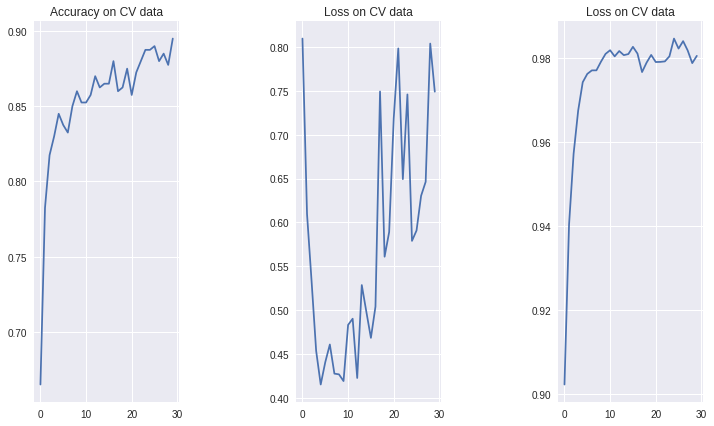

In [21]:
f,ax=plt.subplots(1,3,figsize=(12,3))
pd.Series(acc_list).plot(kind='line',title='Accuracy on CV data',ax=ax[0])
pd.Series(loss_list).plot(kind='line',figsize=(12,7),title='Loss on CV data',ax=ax[1])
pd.Series(auc_list).plot(kind='line',figsize=(12,7),title='AUC on CV data',ax=ax[2])
plt.subplots_adjust(wspace=0.8)
ax[0].set_title('Accuracy on CV data')
ax[1].set_title('Loss on CV data')
ax[2].set_title('Loss on CV data')
plt.show()


In [22]:
#Restoring a pretrained
with tf.Session() as session:
    saver.restore(session, "CNN_MC.ckpt")
    print("Model restored.") 
    print('Initialized')
    k = session.run([tf.nn.softmax(y_pred)], feed_dict={x:test_x[0:64] , hold_prob1:1,hold_prob2:1})

print(np.array(k).shape)

#Reshaping k
k = np.array(k).reshape(64,output_classes)

print(k[0])

pred_labels = []

for i in range(64):
    r = np.round(k[i],3).argmax()
    if r ==0 : pred_labels.append("chair")
    elif r ==1: pred_labels.append("kitchen")
    elif r ==2: pred_labels.append("knife")
    elif r ==3: pred_labels.append("saucepan")

INFO:tensorflow:Restoring parameters from CNN_MC.ckpt
Model restored.
Initialized
(1, 64, 4)
[9.4759139e-07 9.9939978e-01 5.9918134e-04 8.6940084e-08]


(64, 227, 227, 3)


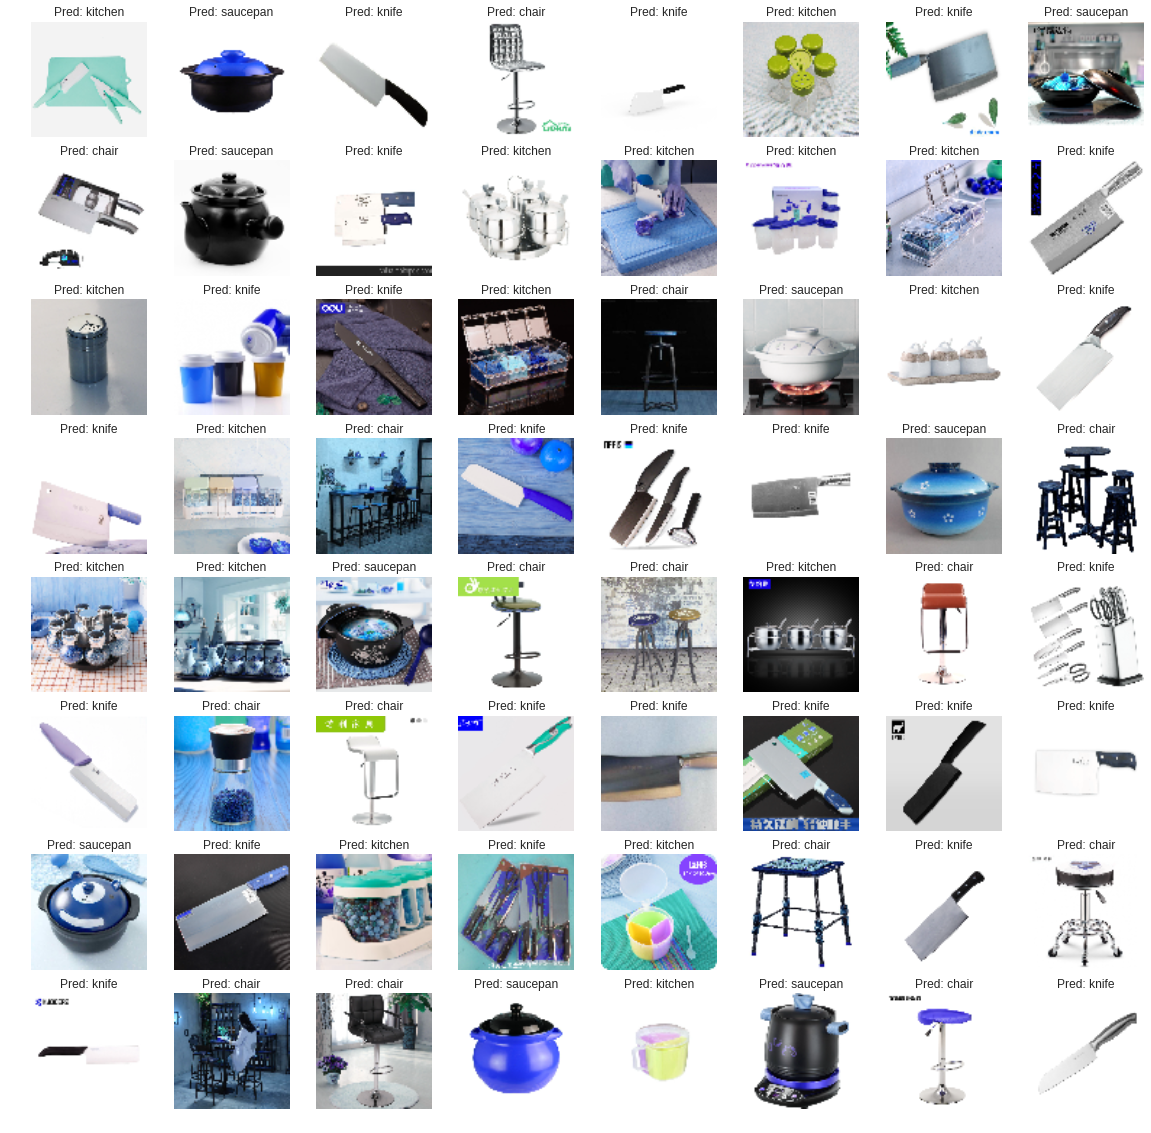

In [23]:
#Multiple images parameters
w=80
h=80
columns = 8
rows = 8

#First 64 images
images = test_x[:64]

print(images.shape)

fig = plt.figure(figsize=(20, 20))
for m in range(1, columns*rows +1):
    img = images[m-1].reshape([IMG_SIZE_ALEXNET, IMG_SIZE_ALEXNET, 3])
    fig.add_subplot(rows, columns, m)
    plt.imshow(img)
    plt.title("Pred: " + pred_labels[m-1])
    plt.axis('off')
plt.show()